In [3]:
import pandas as pd
import numpy as np
import os

In [ ]:
pp = pd.read_csv('df_min_1year.csv', index_col=0)
pp.rename(columns={'RMSE_val': 'RMSE_prophet', 'MAE_val':'MAE_prophet'}, inplace=True)
ml = pd.read_csv('df_min_ml_base_97.csv', index_col=0)
ml.rename(columns={'RMSE_val': 'RMSE_ml', 'MAE_val':'MAE_ml'}, inplace=True)
df = pp.iloc[:, 2:].join(ml.iloc[:, 2:], how='outer')
df

In [21]:
df[sorted(df.columns)].round(2)

,MAE_ml,MAE_prophet,RMSE_ml,RMSE_prophet
D_NO2,12.29,5.91,14.28,7.55
D_PM10K,9.61,7.68,13.19,11.26
N_NO2,6.13,4.20,7.70,5.81
N_O3,7.41,7.69,9.54,9.72
N_Ox,6.94,6.56,8.54,7.94
N_PM10K,6.67,5.45,10.42,7.70
O_NO2,7.28,4.67,8.69,5.90
O_PM10K,7.46,6.69,11.62,9.92
S_NO2,8.46,3.94,10.25,5.15
S_O3,5.96,6.19,7.86,7.92


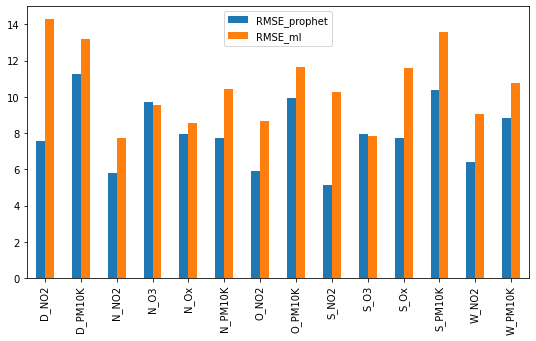

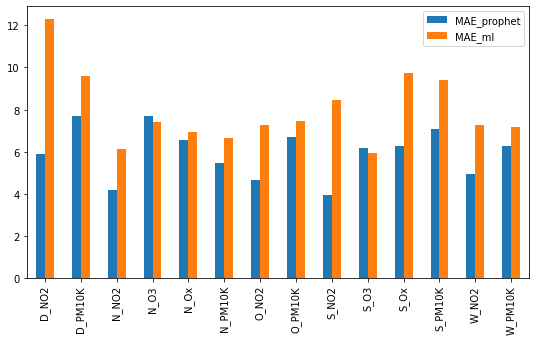

In [13]:
rmse = 'RMSE'
a = df[[c for c in df.columns if rmse in c]].round(2)
a.plot.bar(figsize=(9, 5));

rmse = 'MAE'
a = df[[c for c in df.columns if rmse in c]].round(2)
a.plot.bar(figsize=(9, 5));

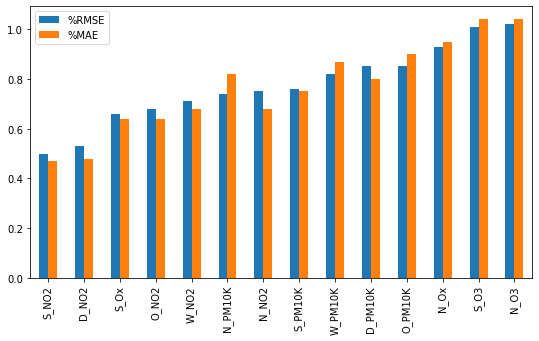

In [22]:
rmse = 'RMSE'
a = df[[c for c in df.columns if rmse in c]].copy()
a['%RMSE'] = (a.iloc[:, 0]/a.iloc[:, 1]).round(2)
# a['percent'].plot.bar(figsize=(9, 5));

rmse = 'MAE'
b = df[[c for c in df.columns if rmse in c]].copy()
b['%MAE'] = (b.iloc[:, 0]/b.iloc[:, 1]).round(2)
a[['%RMSE']].join(b[['%MAE']]).sort_values('%RMSE').plot.bar(figsize=(9, 5));